## Import

In [7]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
%matplotlib inline 

## Reading Dataset

In [9]:
data = pd.read_csv('data.csv')
data =  data.head(100000)
data

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1.320970,0.322409,-0.726385,-0.213455,2.543650,-0.651539,0.020811,-0.570513,-0.188489,...,3.227097,-3.014420,-0.838722,-0.459053,0.125096,0.201045,2.992909,1.685751,0.549955,0.707914
99996,99996,-0.057039,-1.049352,1.027208,-1.926983,-1.301214,-1.378219,-0.694375,-0.698217,1.827320,...,0.601058,-1.468607,4.008811,0.563336,-0.360425,-0.101978,-2.601274,-0.801377,4.651695,-0.008425
99997,99997,0.202086,0.313864,-0.415879,-1.663584,0.371222,2.115718,-2.375172,0.276682,0.076036,...,0.658785,2.152083,-0.288140,NaN,NaN,0.716496,-1.505792,1.183558,-1.132081,-0.065306
99998,99998,0.457656,0.402742,-0.688664,-0.324397,1.241209,0.298621,1.330507,0.902097,1.378357,...,-1.556285,-1.719131,1.575926,0.287239,0.540380,1.039641,3.481709,2.224624,-1.446859,0.804247


In [18]:
df.drop(['row_id'], axis=1)

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,0.256023,-1.059874,-0.001374,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.320970,0.322409,-0.726385,-0.213455,2.543650,-0.651539,0.020811,-0.570513,-0.188489,-0.349556,...,3.227097,-3.014420,-0.838722,-0.459053,0.125096,0.201045,2.992909,1.685751,0.549955,0.707914
99996,-0.057039,-1.049352,1.027208,-1.926983,-1.301214,-1.378219,-0.694375,-0.698217,1.827320,-0.683970,...,0.601058,-1.468607,4.008811,0.563336,-0.360425,-0.101978,-2.601274,-0.801377,4.651695,-0.008425
99997,0.202086,0.313864,-0.415879,-1.663584,0.371222,2.115718,-2.375172,0.276682,0.076036,-0.001435,...,0.658785,2.152083,-0.288140,-0.077540,-0.084398,0.716496,-1.505792,1.183558,-1.132081,-0.065306
99998,0.457656,0.402742,-0.688664,-0.324397,1.241209,0.298621,1.330507,0.902097,1.378357,-0.280843,...,-1.556285,-1.719131,1.575926,0.287239,0.540380,1.039641,3.481709,2.224624,-1.446859,0.804247


## Overview On Dataset

In [10]:
data.shape

(100000, 81)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 81 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   row_id  100000 non-null  int64  
 1   F_1_0   98180 non-null   float64
 2   F_1_1   98218 non-null   float64
 3   F_1_2   98179 non-null   float64
 4   F_1_3   98207 non-null   float64
 5   F_1_4   98160 non-null   float64
 6   F_1_5   98192 non-null   float64
 7   F_1_6   98135 non-null   float64
 8   F_1_7   98201 non-null   float64
 9   F_1_8   98194 non-null   float64
 10  F_1_9   98134 non-null   float64
 11  F_1_10  98213 non-null   float64
 12  F_1_11  98155 non-null   float64
 13  F_1_12  98171 non-null   float64
 14  F_1_13  98175 non-null   float64
 15  F_1_14  98211 non-null   float64
 16  F_2_0   100000 non-null  int64  
 17  F_2_1   100000 non-null  int64  
 18  F_2_2   100000 non-null  int64  
 19  F_2_3   100000 non-null  int64  
 20  F_2_4   100000 non-null  int64  
 21  F_2_5   100

In [12]:
data.describe() 

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,100000.000000,98180.000000,98218.000000,98179.000000,98207.000000,98160.000000,98192.000000,98135.000000,98201.000000,98194.000000,...,98174.000000,98132.000000,98173.000000,98177.000000,98174.000000,98247.000000,98199.000000,98171.000000,98174.000000,98185.000000
mean,49999.500000,-0.001807,0.000445,-0.001374,-0.000156,0.000993,-0.002308,0.001033,-0.063648,-0.001795,...,0.345787,0.002869,0.334443,-0.077540,-0.084398,0.035556,0.570460,0.329542,0.340748,0.037103
std,28867.657797,1.001913,1.002968,1.002953,0.998754,1.001219,1.000158,1.002080,0.729983,1.000524,...,2.350873,2.284213,2.364858,0.780615,0.807217,0.708324,5.000384,2.391230,2.368977,0.774977
min,0.000000,-4.439416,-4.685783,-4.496883,-4.226710,-4.014847,-4.368748,-4.569247,-5.146900,-4.465326,...,-8.673384,-10.505595,-9.557473,-6.852710,-6.562118,-5.035706,-22.918239,-10.583340,-9.668369,-6.062120
25%,24999.750000,-0.679961,-0.675954,-0.680370,-0.675131,-0.673233,-0.675664,-0.673310,-0.498705,-0.671624,...,-1.261291,-1.568724,-1.223478,-0.522113,-0.578692,-0.388329,-2.781069,-1.286719,-1.296002,-0.394608
50%,49999.500000,-0.004195,0.002514,0.000049,-0.002131,0.005069,0.001246,0.001555,0.000614,-0.000855,...,0.310455,-0.076407,0.379742,0.014364,-0.030368,0.100634,0.240220,0.348957,0.304113,0.130583
75%,74999.250000,0.670795,0.677679,0.678608,0.674535,0.675141,0.670996,0.677302,0.445761,0.671325,...,1.924444,1.520094,1.927038,0.468623,0.473851,0.527691,3.656460,1.946047,1.940065,0.571990
max,99999.000000,4.315087,4.270903,4.448431,4.444356,4.394431,4.569046,4.147675,2.451543,4.035670,...,10.671492,9.951789,11.124988,2.282734,2.725490,2.364837,24.793707,11.341926,10.785682,2.584492


In [13]:
data.isnull().sum()

row_id       0
F_1_0     1820
F_1_1     1782
F_1_2     1821
F_1_3     1793
          ... 
F_4_10    1753
F_4_11    1801
F_4_12    1829
F_4_13    1826
F_4_14    1815
Length: 81, dtype: int64

## Simple Imputer

In [14]:
df = data

strategies = ['mean', 'median']
dataframes = []
for s in strategies:
    imp = SimpleImputer(strategy=s) 
    my_array = imp.fit_transform(df)
    df = pd.DataFrame(my_array, columns = [col for col in df])
    print(f'{s} strategy: \n{df.isnull().sum()} \n')
    dataframes.append(df)

mean strategy: 
row_id    0
F_1_0     0
F_1_1     0
F_1_2     0
F_1_3     0
         ..
F_4_10    0
F_4_11    0
F_4_12    0
F_4_13    0
F_4_14    0
Length: 81, dtype: int64 

median strategy: 
row_id    0
F_1_0     0
F_1_1     0
F_1_2     0
F_1_3     0
         ..
F_4_10    0
F_4_11    0
F_4_12    0
F_4_13    0
F_4_14    0
Length: 81, dtype: int64 



In [15]:
mean_imputed = dataframes[0]
mean_imputed

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0.0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.0,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2.0,0.256023,-1.059874,-0.001374,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3.0,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4.0,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,1.320970,0.322409,-0.726385,-0.213455,2.543650,-0.651539,0.020811,-0.570513,-0.188489,...,3.227097,-3.014420,-0.838722,-0.459053,0.125096,0.201045,2.992909,1.685751,0.549955,0.707914
99996,99996.0,-0.057039,-1.049352,1.027208,-1.926983,-1.301214,-1.378219,-0.694375,-0.698217,1.827320,...,0.601058,-1.468607,4.008811,0.563336,-0.360425,-0.101978,-2.601274,-0.801377,4.651695,-0.008425
99997,99997.0,0.202086,0.313864,-0.415879,-1.663584,0.371222,2.115718,-2.375172,0.276682,0.076036,...,0.658785,2.152083,-0.288140,-0.077540,-0.084398,0.716496,-1.505792,1.183558,-1.132081,-0.065306
99998,99998.0,0.457656,0.402742,-0.688664,-0.324397,1.241209,0.298621,1.330507,0.902097,1.378357,...,-1.556285,-1.719131,1.575926,0.287239,0.540380,1.039641,3.481709,2.224624,-1.446859,0.804247


In [17]:
median_imputed = dataframes[1]
median_imputed

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0.0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.0,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2.0,0.256023,-1.059874,-0.001374,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3.0,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4.0,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,1.320970,0.322409,-0.726385,-0.213455,2.543650,-0.651539,0.020811,-0.570513,-0.188489,...,3.227097,-3.014420,-0.838722,-0.459053,0.125096,0.201045,2.992909,1.685751,0.549955,0.707914
99996,99996.0,-0.057039,-1.049352,1.027208,-1.926983,-1.301214,-1.378219,-0.694375,-0.698217,1.827320,...,0.601058,-1.468607,4.008811,0.563336,-0.360425,-0.101978,-2.601274,-0.801377,4.651695,-0.008425
99997,99997.0,0.202086,0.313864,-0.415879,-1.663584,0.371222,2.115718,-2.375172,0.276682,0.076036,...,0.658785,2.152083,-0.288140,-0.077540,-0.084398,0.716496,-1.505792,1.183558,-1.132081,-0.065306
99998,99998.0,0.457656,0.402742,-0.688664,-0.324397,1.241209,0.298621,1.330507,0.902097,1.378357,...,-1.556285,-1.719131,1.575926,0.287239,0.540380,1.039641,3.481709,2.224624,-1.446859,0.804247


#### The mean is used for normal distributions. The median is generally used for skewed distributions. The mean is not a robust tool since it is largely influenced by outliers. The median is better suited for skewed distributions to derive at central tendency since it is much more robust and sensible.

<IPython.core.display.Javascript object>

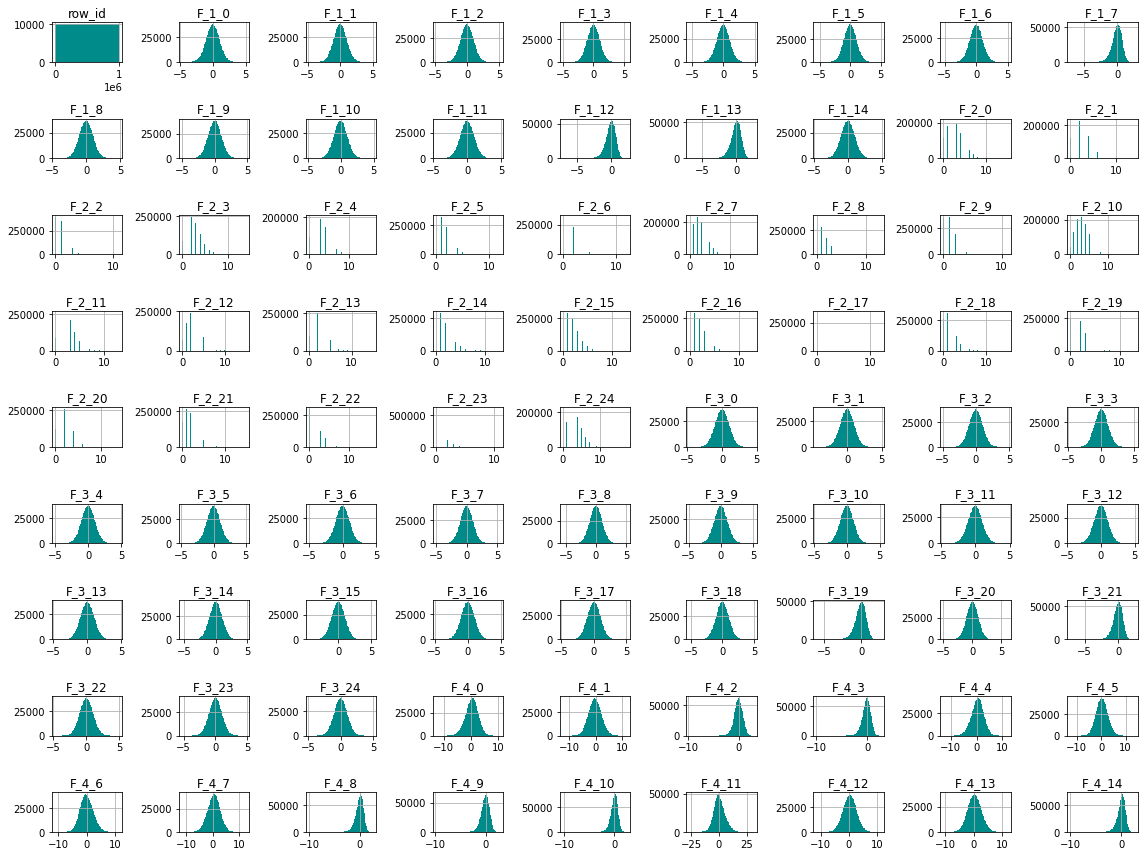

In [11]:
data.hist(bins=100, figsize=(16,12), color='darkcyan')
plt.tight_layout()

<IPython.core.display.Javascript object>

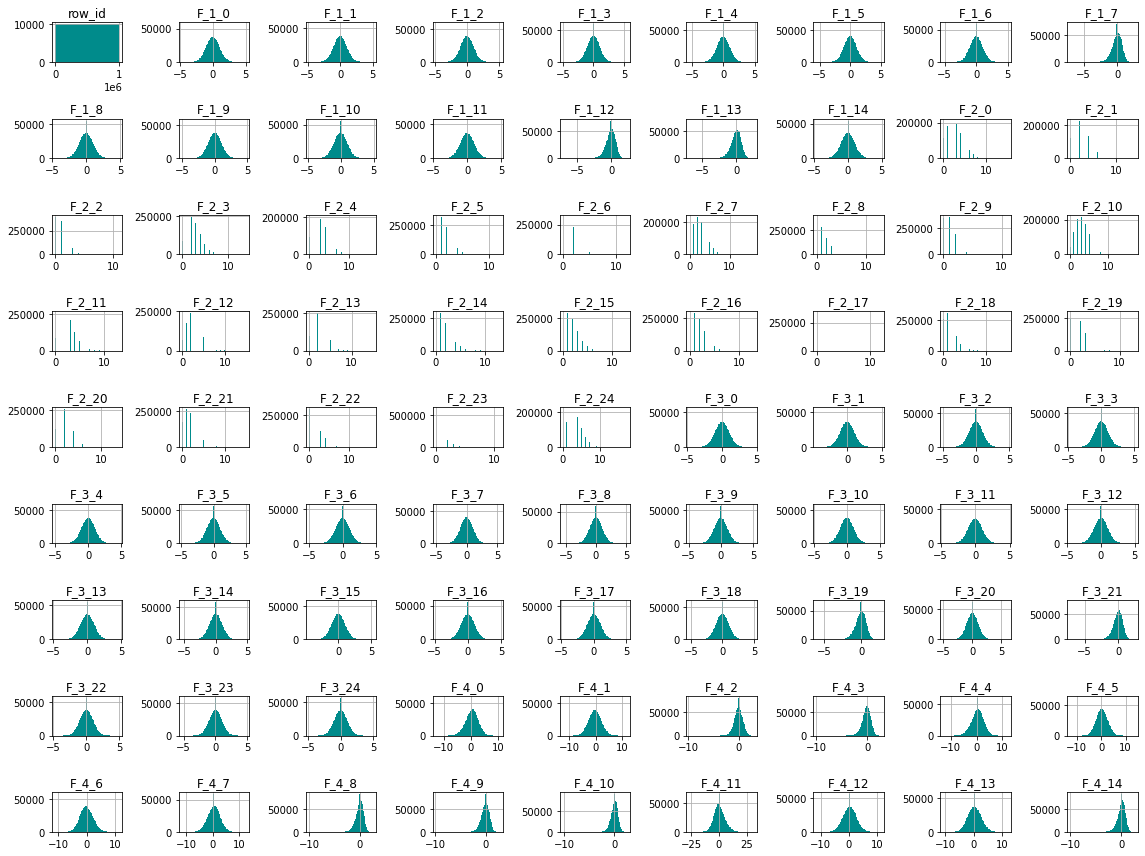

In [12]:
mean_imputed.hist(bins=100, figsize=(16,12), color='darkcyan')
plt.tight_layout()

#### Here we can compare data, before and and imputation. If the volume of changes was large, it shows that strategy is not suitable enough!

## Iterative Imputer

In [5]:
df = df.head(100000)
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0.0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.0,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2.0,0.256023,-1.059874,-0.008761,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3.0,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4.0,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,1.320970,0.322409,-0.726385,-0.213455,2.543650,-0.651539,0.020811,-0.570513,-0.188489,...,3.227097,-3.014420,-0.838722,-0.459053,0.125096,0.201045,2.992909,1.685751,0.549955,0.707914
99996,99996.0,-0.057039,-1.049352,1.027208,-1.926983,-1.301214,-1.378219,-0.694375,-0.698217,1.827320,...,0.601058,-1.468607,4.008811,0.563336,-0.360425,-0.101978,-2.601274,-0.801377,4.651695,-0.008425
99997,99997.0,0.202086,0.313864,-0.415879,-1.663584,0.371222,2.115718,-2.375172,0.276682,0.076036,...,0.658785,2.152083,-0.288140,0.589238,-0.347690,0.716496,-1.505792,1.183558,-1.132081,-0.065306
99998,99998.0,0.457656,0.402742,-0.688664,-0.324397,1.241209,0.298621,1.330507,0.902097,1.378357,...,-1.556285,-1.719131,1.575926,0.287239,0.540380,1.039641,3.481709,2.224624,-1.446859,0.804247


In [71]:
df_imputed.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

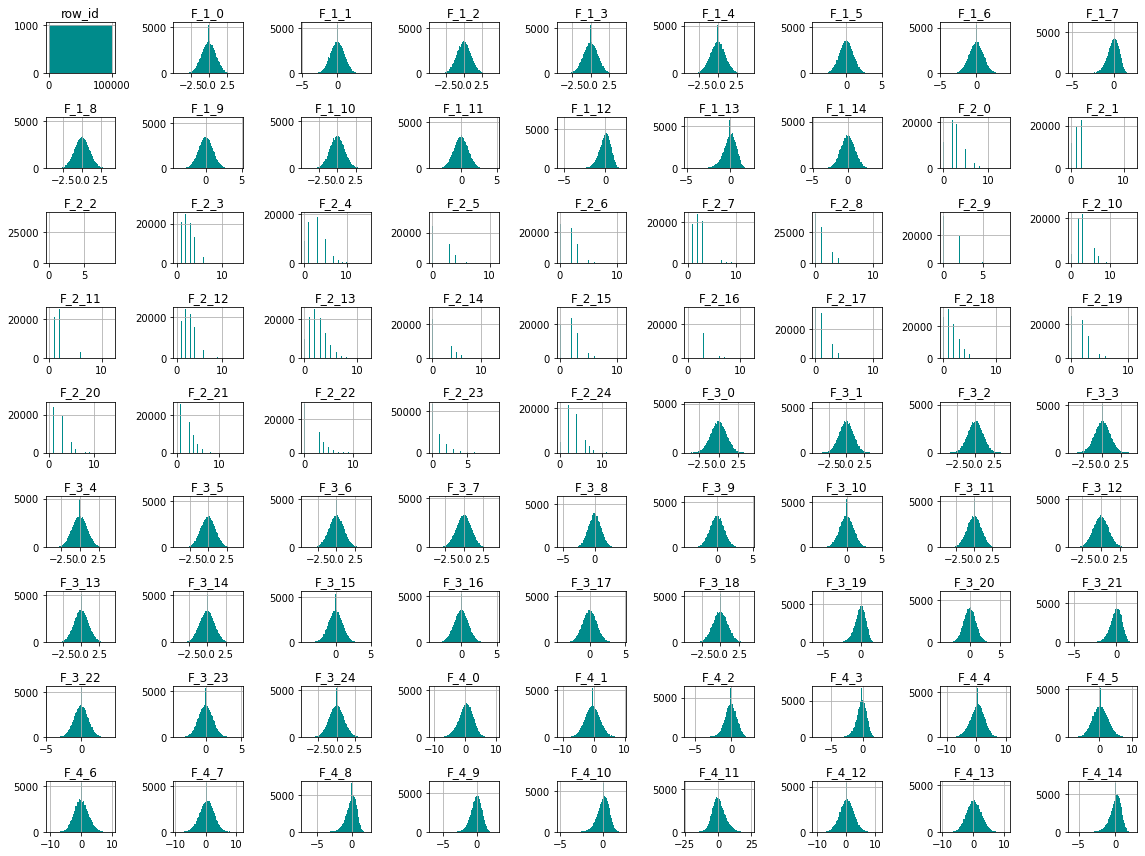

In [19]:
median_imputed.hist(bins=100, figsize=(16,12), color='darkcyan')
plt.tight_layout()